In [3]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("Mall_Customers.csv")
data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Annual Income vs Spending score Relation

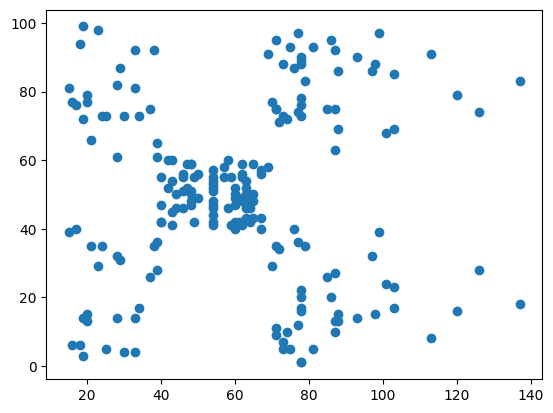

In [5]:
plt.scatter(
    data["Annual Income (k$)"],
    data["Spending Score (1-100)"]
)

In [6]:
k_range = range(1,10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(data[["Annual Income (k$)", "Spending Score (1-100)"]])
    sse.append(km.inertia_)

Text(0, 0.5, 'Sum of Error')

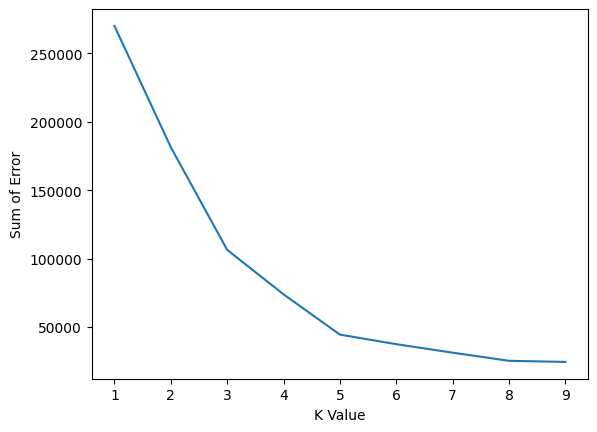

In [7]:
plt.plot(k_range, sse)
plt.xlabel("K Value")
plt.ylabel("Sum of Error")

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['Age'] = scaler.fit_transform(data[['Age']])
data['Annual Income (k$)'] = scaler.fit_transform(data[['Annual Income (k$)']])
data['Spending Score (1-100)'] = scaler.fit_transform(data[['Spending Score (1-100)']])
data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,0.019231,0.000000,0.387755
1,2,Male,0.057692,0.000000,0.816327
2,3,Female,0.038462,0.008197,0.051020
3,4,Female,0.096154,0.008197,0.775510
4,5,Female,0.250000,0.016393,0.397959


In [9]:
k_range = range(1,10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(data[["Annual Income (k$)", "Spending Score (1-100)"]])
    sse.append(km.inertia_)

Text(0, 0.5, 'Sum of Error')

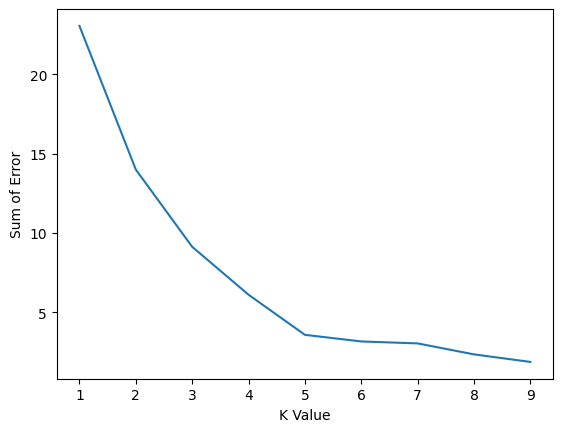

In [10]:
plt.plot(k_range, sse)
plt.xlabel("K Value")
plt.ylabel("Sum of Error")

In [11]:
kmeans = KMeans(n_clusters=5)
y_pred = kmeans.fit_predict(data[["Annual Income (k$)", "Spending Score (1-100)"]])
y_pred

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3,
       1, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 4, 2, 3, 2, 4, 2, 4, 2,
       3, 2, 4, 2, 4, 2, 4, 2, 4, 2, 3, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

In [12]:
data['cluster'] = y_pred
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,0.019231,0.000000,0.387755,1
1,2,Male,0.057692,0.000000,0.816327,0
2,3,Female,0.038462,0.008197,0.051020,1
3,4,Female,0.096154,0.008197,0.775510,0
4,5,Female,0.250000,0.016393,0.397959,1
...,...,...,...,...,...,...
195,196,Female,0.326923,0.860656,0.795918,2
196,197,Female,0.519231,0.909836,0.275510,4
197,198,Male,0.269231,0.909836,0.744898,2
198,199,Male,0.269231,1.000000,0.173469,4


In [13]:
kmeans.cluster_centers_

array([[0.08792846, 0.79962894],
       [0.09265859, 0.20319432],
       [0.58638083, 0.82783883],
       [0.33029751, 0.49508692],
       [0.6       , 0.16443149]])

In [14]:
data1 = data[data.cluster == 0]
data2 = data[data.cluster == 1]
data3 = data[data.cluster == 2]
data4 = data[data.cluster == 3]
data5 = data[data.cluster == 4]

[]

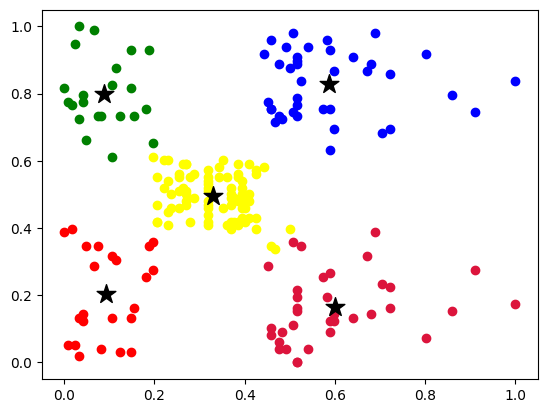

In [15]:
plt.scatter(data1['Annual Income (k$)'], data1['Spending Score (1-100)'], color='green')
plt.scatter(data2['Annual Income (k$)'], data2['Spending Score (1-100)'], color='red')
plt.scatter(data3['Annual Income (k$)'], data3['Spending Score (1-100)'], color='blue')
plt.scatter(data4['Annual Income (k$)'], data4['Spending Score (1-100)'], color='yellow')
plt.scatter(data5['Annual Income (k$)'], data5['Spending Score (1-100)'], color='crimson')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color='black',marker='*',label='centroid',s=200)
plt.plot()


# Age vs Spending score

In [18]:
def kmeans_centroid(X):
    k_range = range(1, 11)
    sse = []
    
    for k in k_range:
      
        km = KMeans(n_clusters=k, n_init="auto", random_state=42)
        km.fit(X) 
        sse.append(km.inertia_)

    plt.figure(figsize=(8, 5))
    plt.plot(k_range, sse) 
    plt.xlabel("K")
    plt.ylabel("Sum of Squared Error")
    plt.show()


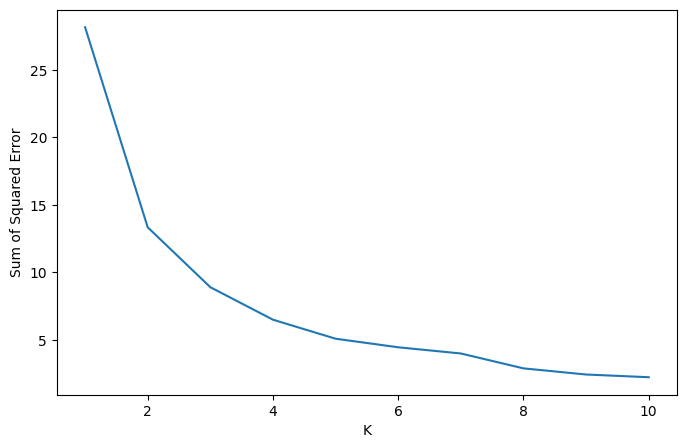

In [19]:
kmeans_centroid(X = data[['Age' , 'Spending Score (1-100)']].iloc[: , :].values)

In [27]:
def k_means(X, k):

    kmeans = KMeans(n_clusters= k)
    y_pred = kmeans.fit_predict(X)
    data['cluster'] = y_pred

    kmeans.cluster_centers_

    data1 = data[data.cluster == 0]
    data2 = data[data.cluster == 1]
    data3 = data[data.cluster == 2]
    data4 = data[data.cluster == 3]
    data5 = data[data.cluster == 4]

    plt.scatter(data1['Age'], data1['Spending Score (1-100)'], color='green')
    plt.scatter(data2['Age'], data2['Spending Score (1-100)'], color='red')
    plt.scatter(data3['Age'], data3['Spending Score (1-100)'], color='blue')
    plt.scatter(data4['Age'], data4['Spending Score (1-100)'], color='yellow')
    plt.scatter(data5['Age'], data5['Spending Score (1-100)'], color='crimson')
    plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color='black',marker='*',label='centroid',s=200)
    plt.plot()

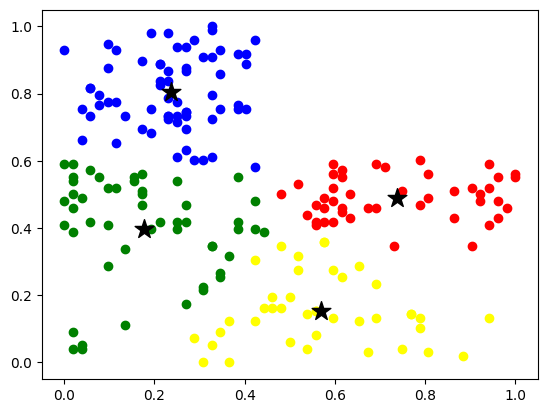

In [32]:
k_means(X = data[['Age' , 'Spending Score (1-100)']].iloc[: , :].values, k =4)

# Age vs Annual Income

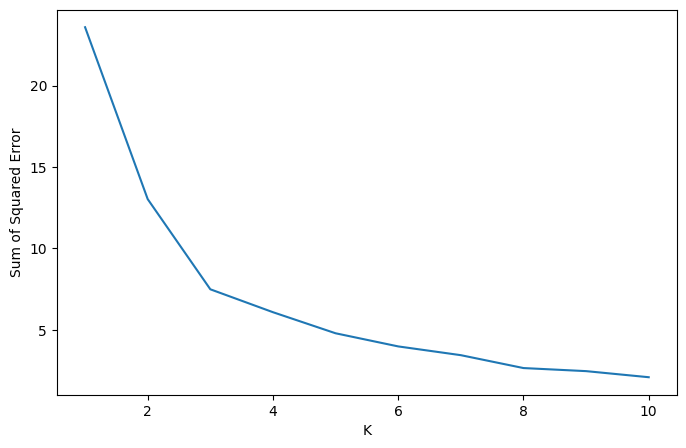

In [23]:
kmeans_centroid(X = data[['Age' , 'Annual Income (k$)']].iloc[: , :].values)

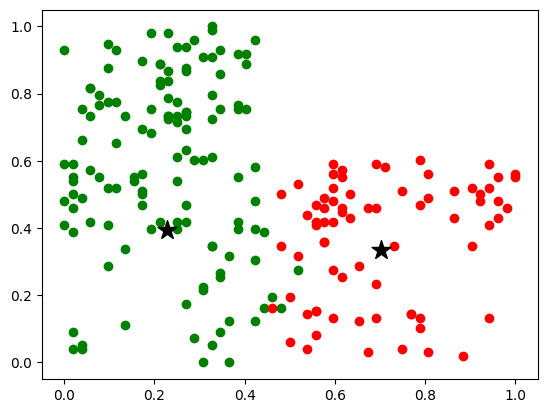

In [31]:
k_means(X = data[['Age' , 'Annual Income (k$)']].iloc[: , :].values, k=2)